In [2]:
function kolmogorov_psd(C2n,L0,l0,k)
    Kolm_Phi = 0.033*C2n*k^(-11/3)
    return Kolm_Phi
end

kolmogorov_psd (generic function with 1 method)

In [3]:
function vonKarman_psd(C2n,L0,l0,k)
    k_m = 5.92/l0
    k_0 = 2*pi/L0
    vKarm_Phi = 0.033*C2n*exp(-k^2 / k_m^2)/((k^2 + k_0^2)^(11/6))
    return vKarm_Phi
end

vonKarman_psd (generic function with 1 method)

In [4]:
function tatarski_psd(C2n,L0,l0,k)
    k_m = 5.92/l0
    ttrski_Phi = 0.033*k^(-11/3)*exp(-k^2/k_m^2)
    return ttrski_Phi
end

tatarski_psd (generic function with 1 method)

In [141]:
function mod_atm_psd(C2n,L0,l0,k)
    k_l = 3.3/l0
    k_0 = 2*pi/L0
    modatm_Phi =0.033*C2n*[1+1.802*(k/k_l)-0.254*(k/k_l)^(7/6)]*exp(-k^2/k_l^2)/((k^2+k_0^2)^(11/6))
    return modatm_Phi
end

mod_atm_psd (generic function with 1 method)

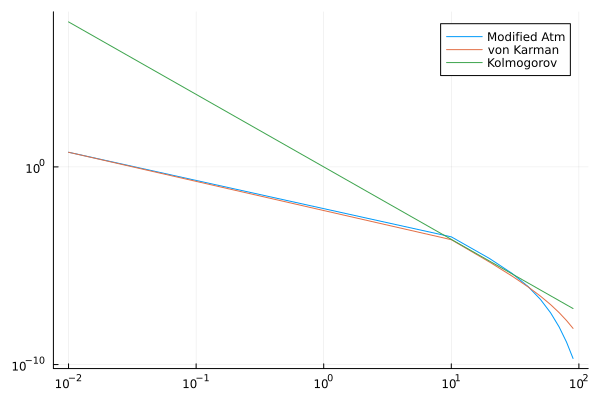

In [177]:
# Input C^2_n, structure parameter for turbulence [m^(2/3)], L0 outer scale [m], and l0 kolmogorov microscale [m]
C2n = 10^(-13)
L0  = 10
l0  = 0.1
k   = 10^-2:10:100

# Initialize an empty array for y
y1 = Float64[]
y2 = Float64[]
y3 = Float64[]
y4 = Float64[]# Ensure y is of type Float64

# Compute y values using a for loop
for kk in k
    append!(y1,mod_atm_psd(C2n, L0, l0, kk))
    append!(y3,vonKarman_psd(C2n, L0, l0, kk))
    append!(y4,kolmogorov_psd(C2n, L0, l0, kk))
end
plot(k, [y1/(C2n*.033), y3/(C2n*.033), y4/(C2n*.033)],xaxis=:log,yaxis=:log,label=["Modified Atm" "von Karman" "Kolmogorov"])

